In [50]:
import matplotlib.pyplot as plt
import numpy as np

from romgw.config.env import PROJECT_ROOT
from romgw.typing.core import RealArray, BBHSpinType, DatasetType
from romgw.typing.utils import validate_literal
from romgw.waveform.params import PhysicalParams

In [51]:
def main(
    bbh_spin: BBHSpinType,
    dataset: DatasetType,
    verbose: bool = False
) -> None:
    """Look into the parameter spaces for different datasets."""
    # ----- Validate args -----
    bbh_spin = validate_literal(bbh_spin, BBHSpinType)
    dataset = validate_literal(dataset, DatasetType)

    # ----- Load param space -----
    param_space_file = (
        PROJECT_ROOT / "data" / bbh_spin / dataset / "parameter_space.npy"
    )
    param_space: RealArray = np.load(param_space_file, allow_pickle=False)
        
    # ----- Validate params -----
    if bbh_spin == "PS":
        physical_params = [
            PhysicalParams(*(params[0], params[1:4], params[4:7]))
            for params in param_space
    ]
    else:
        physical_params = [
            PhysicalParams(*params)
            for params in param_space
    ]
    if verbose:
        print(f"The param space is physical.")
        print(f"{param_space.shape=}\n"
              f"param_space_means={param_space.mean(axis=0).tolist()}")

    # ----- Param labels -----
    if bbh_spin == "PS":
        param_labels = [
            "q", "chi1_x", "chi1_y", "chi1_z", "chi2_x", "chi2_y", "chi2_z"
        ]
    else:
        param_labels = [
            "q", "chi1", "chi2"
        ]
    if verbose:
        print(f"{param_labels=}")

    # ----- Plotting param spaces -----
    fig, axs = plt.subplots(len(param_labels),
                            1,
                            figsize=(12, 2*len(param_labels)))

    for i, (ax, param) in enumerate(zip(axs, param_labels)):
        ax.hist(param_space[:, i], bins=29, density=True)

        ax.set_xlabel(param)
        if param == "q":  # mass ratio in [1, 10]
            ax.vlines([1, 10], *ax.get_ylim(),
                      color='r', linestyle='--', alpha=0.5)
            ax.set_xlim(0.55, 10.45)
            ax.set_xticks(np.arange(1, 10 + 1))

        else:  # spin components in [-1, 1]
            ax.vlines([-1, 1], *ax.get_ylim(),
                      color='r', linestyle='--', alpha=0.5)
            ax.set_xlim(-1.1, 1.1)
            ax.set_xticks(np.linspace(-1, 1, 11))

        ax.set_ylabel("density")

        ax.set_title(f"{param}-space for the {bbh_spin} ({dataset}) dataset")

    fig.tight_layout()
    plt.show()

The param space is physical.
param_space.shape=(4096, 7)
param_space_means=[5.5466010524203115, -0.0017717715576659298, 0.0007931524822627571, -0.00021467017495566769, -0.0036455013530953878, 0.004674573118239749, 0.0019021564170304823]
param_labels=['q', 'chi1_x', 'chi1_y', 'chi1_z', 'chi2_x', 'chi2_y', 'chi2_z']


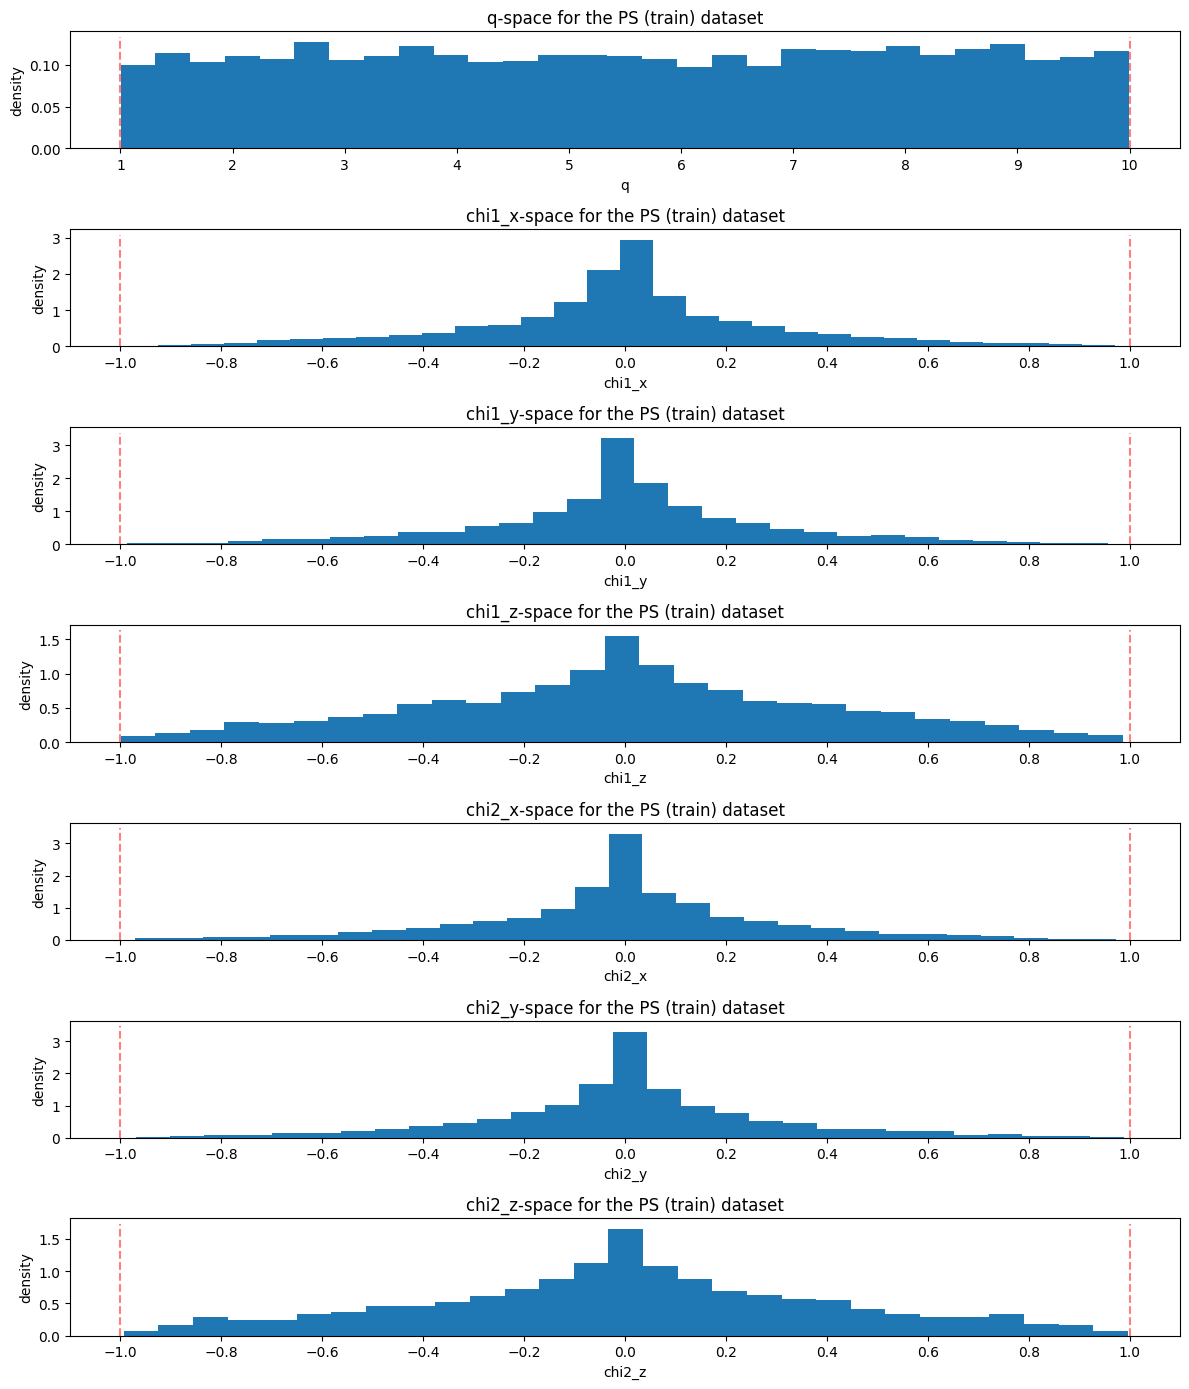

In [53]:
main(bbh_spin="PS", dataset="train", verbose=True)